In [1]:
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def loader_data(directed, refinement = False):
    
    # check the directed value
    if directed: lab = ''
    else: lab = '_und'
        
    if refinement: ref = '_refinement'
    else: ref = ''
        
    # STATS
    # reading from keys
    with open("results/keys_stats{}{}.txt".format(lab, ref), "r") as f:
        keys = eval(f.read())

    stats = {}
    # reading dataframes
    for key in keys:
        stats[key] = pd.read_csv("results/stats{}_{}{}.csv".format(lab, str(key), ref))
        
    # DATA
    # reading from keys
    with open("results/keys_data{}{}.txt".format(lab, ref), "r") as f:
        keys = eval(f.read())

    data = {}
    # reading dataframes
    for key in keys:
        data[key] = [pd.read_csv("results/data{}_metrics{}.csv".format(lab, ref)),
                     pd.read_csv("results/data{}_levels{}.csv".format(lab, ref))]

    return stats, data

In [3]:
stats_dir, data_dir = loader_data(True)
stats_und, data_und = loader_data(False)
stats_dir_ref, data_dir_ref = loader_data(True, True)
stats_und_ref, data_und_ref = loader_data(False, True)

In [4]:
def plot_data(directed, data, refinement = False):
        
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
        
    if refinement: 
        ref = '_ref'
    else : ref = ''
    
    fig, axs = plt.subplots(5,2,figsize = (20,40),sharey = True)
    for i, k in enumerate(data.keys()):
        _ = axs[i,0].set_title('Metrics with p = {}'.format(k))
        _ = data[k][0].boxplot(ax = axs[i,0])

        _ = axs[i,1].set_title('Levels with p = {}'.format(k))
        _ = data[k][1].boxplot(ax = axs[i,1])

    plt.savefig('images/box_{}{}.jpeg'.format(lab, ref))
    
    return

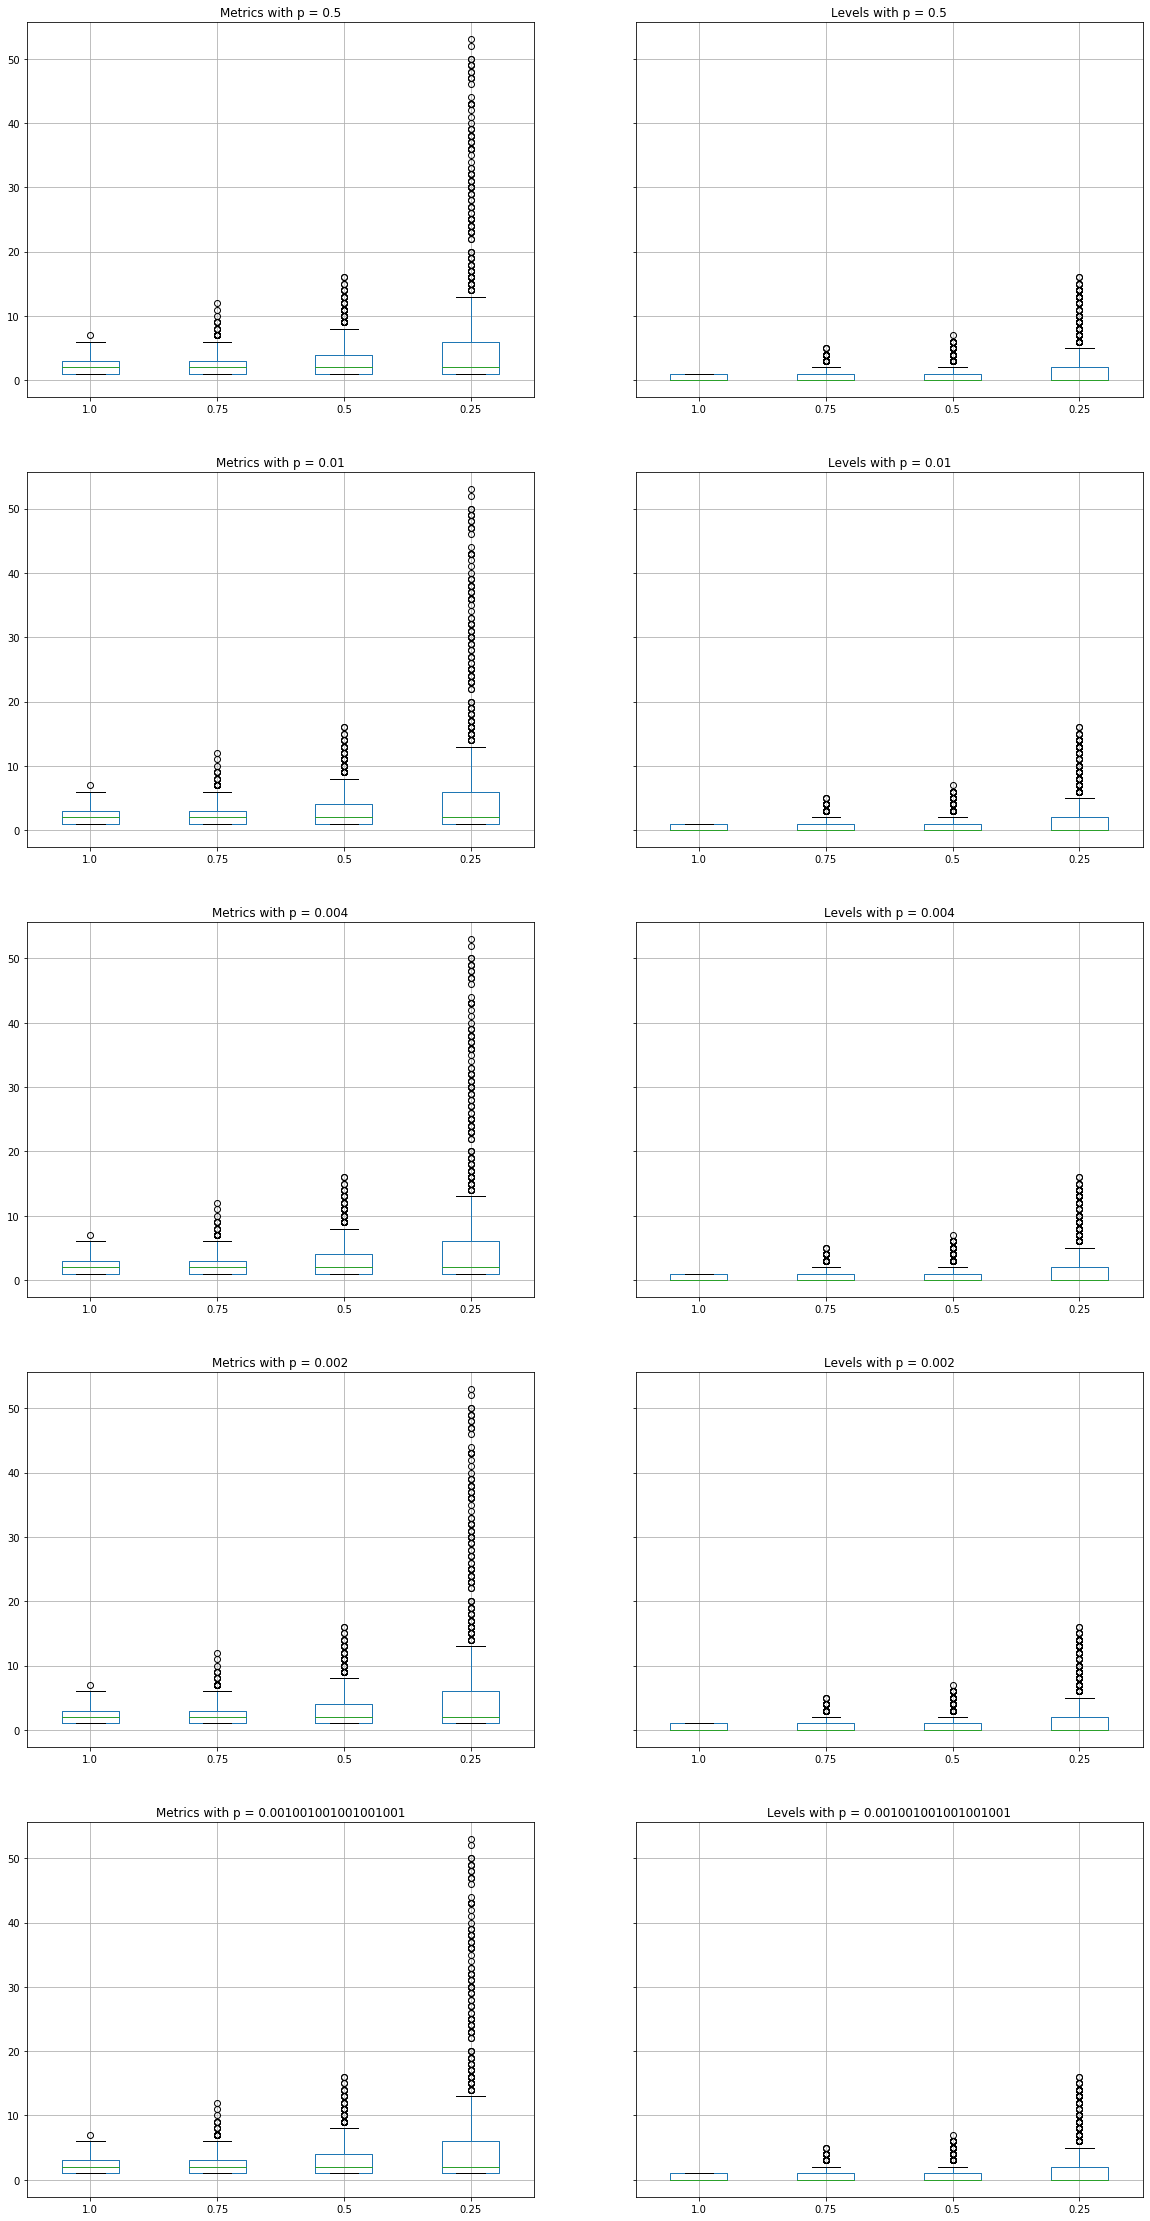

In [5]:
plot_data(True, data_dir)

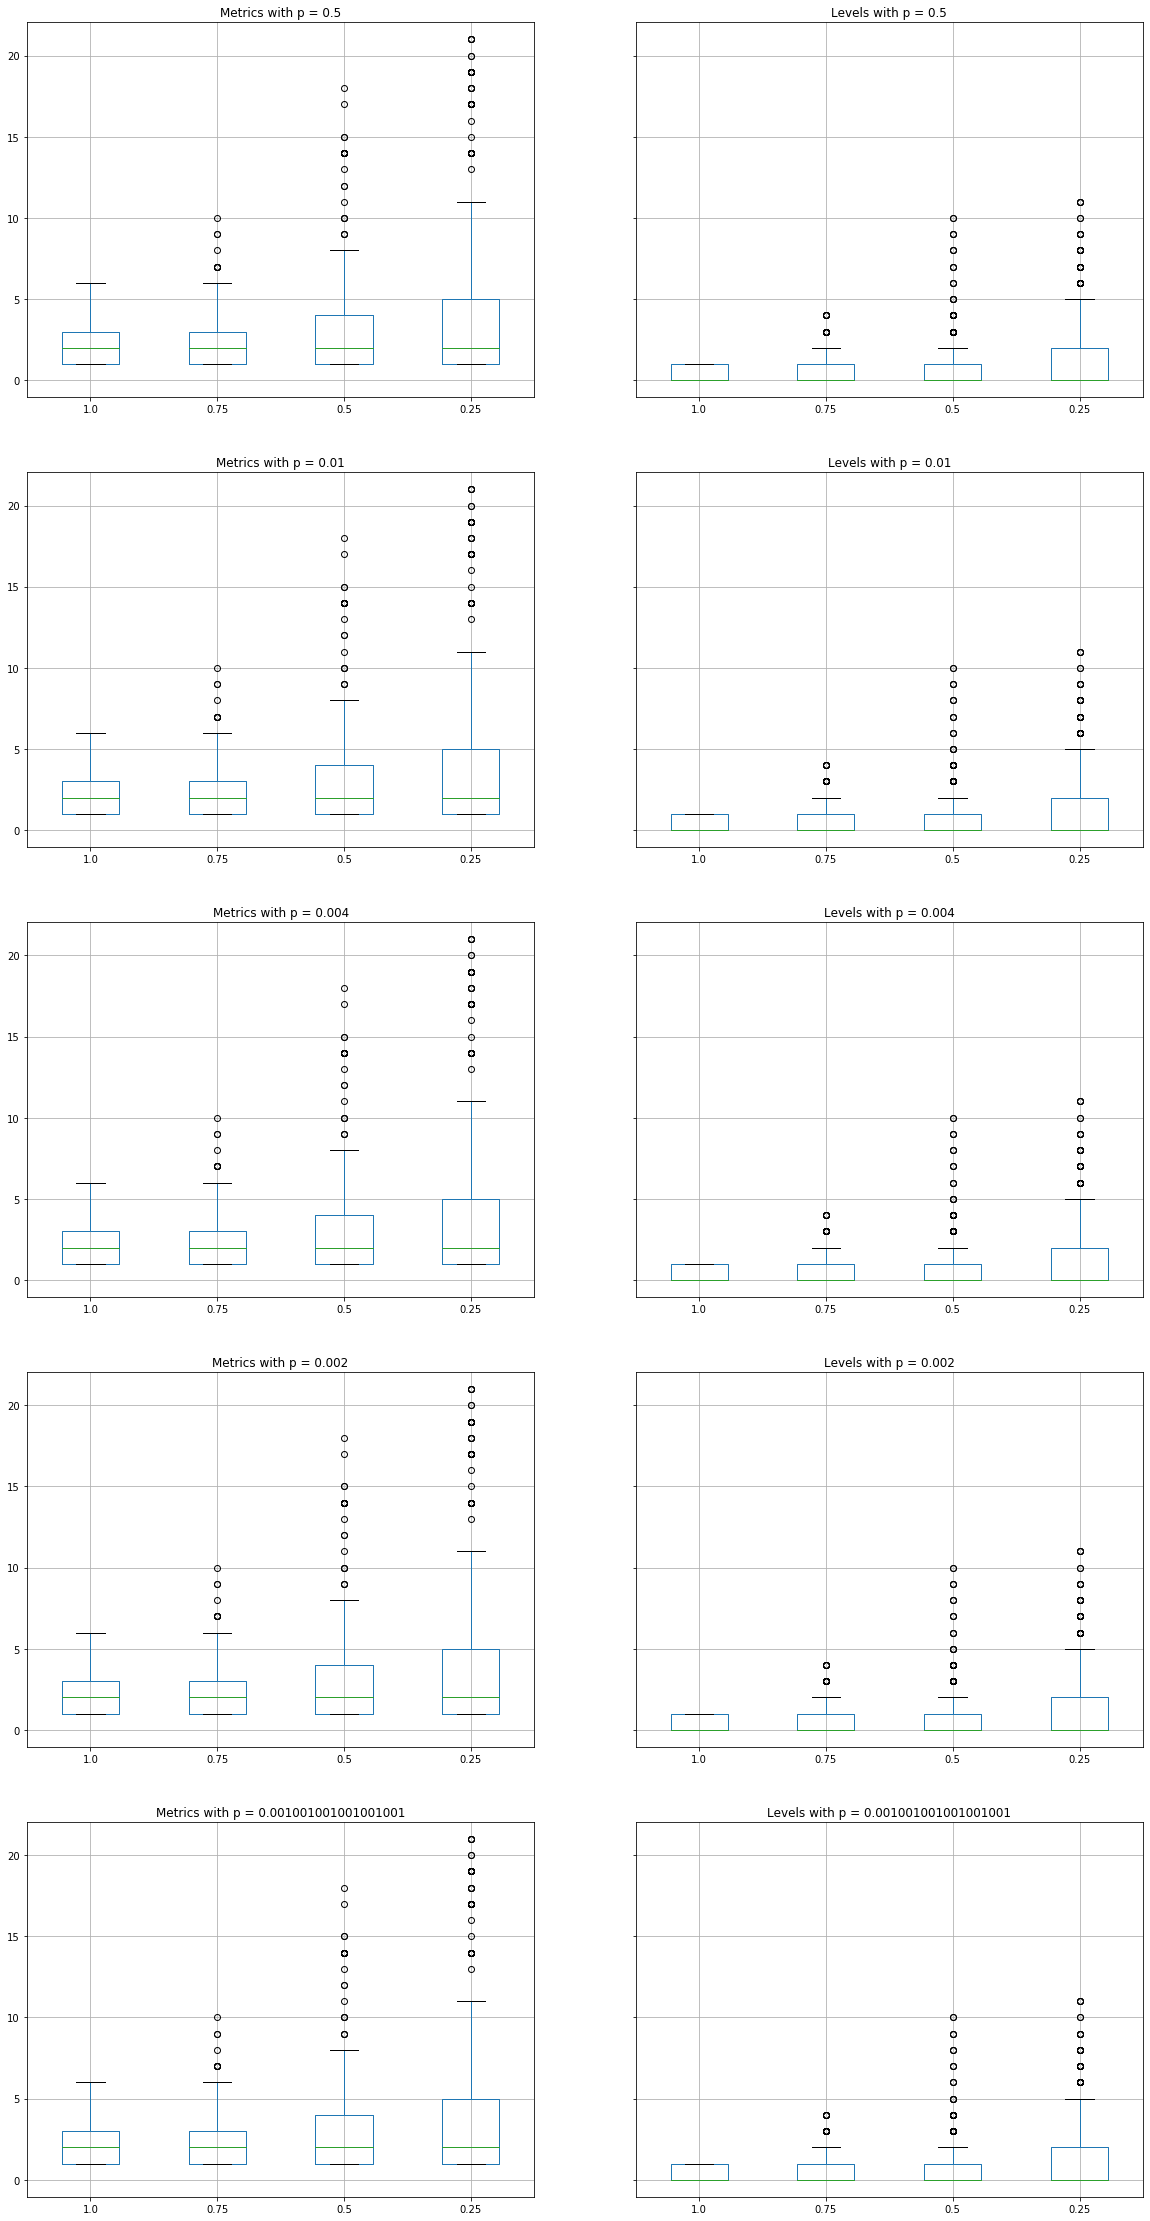

In [6]:
plot_data(False, data_und)

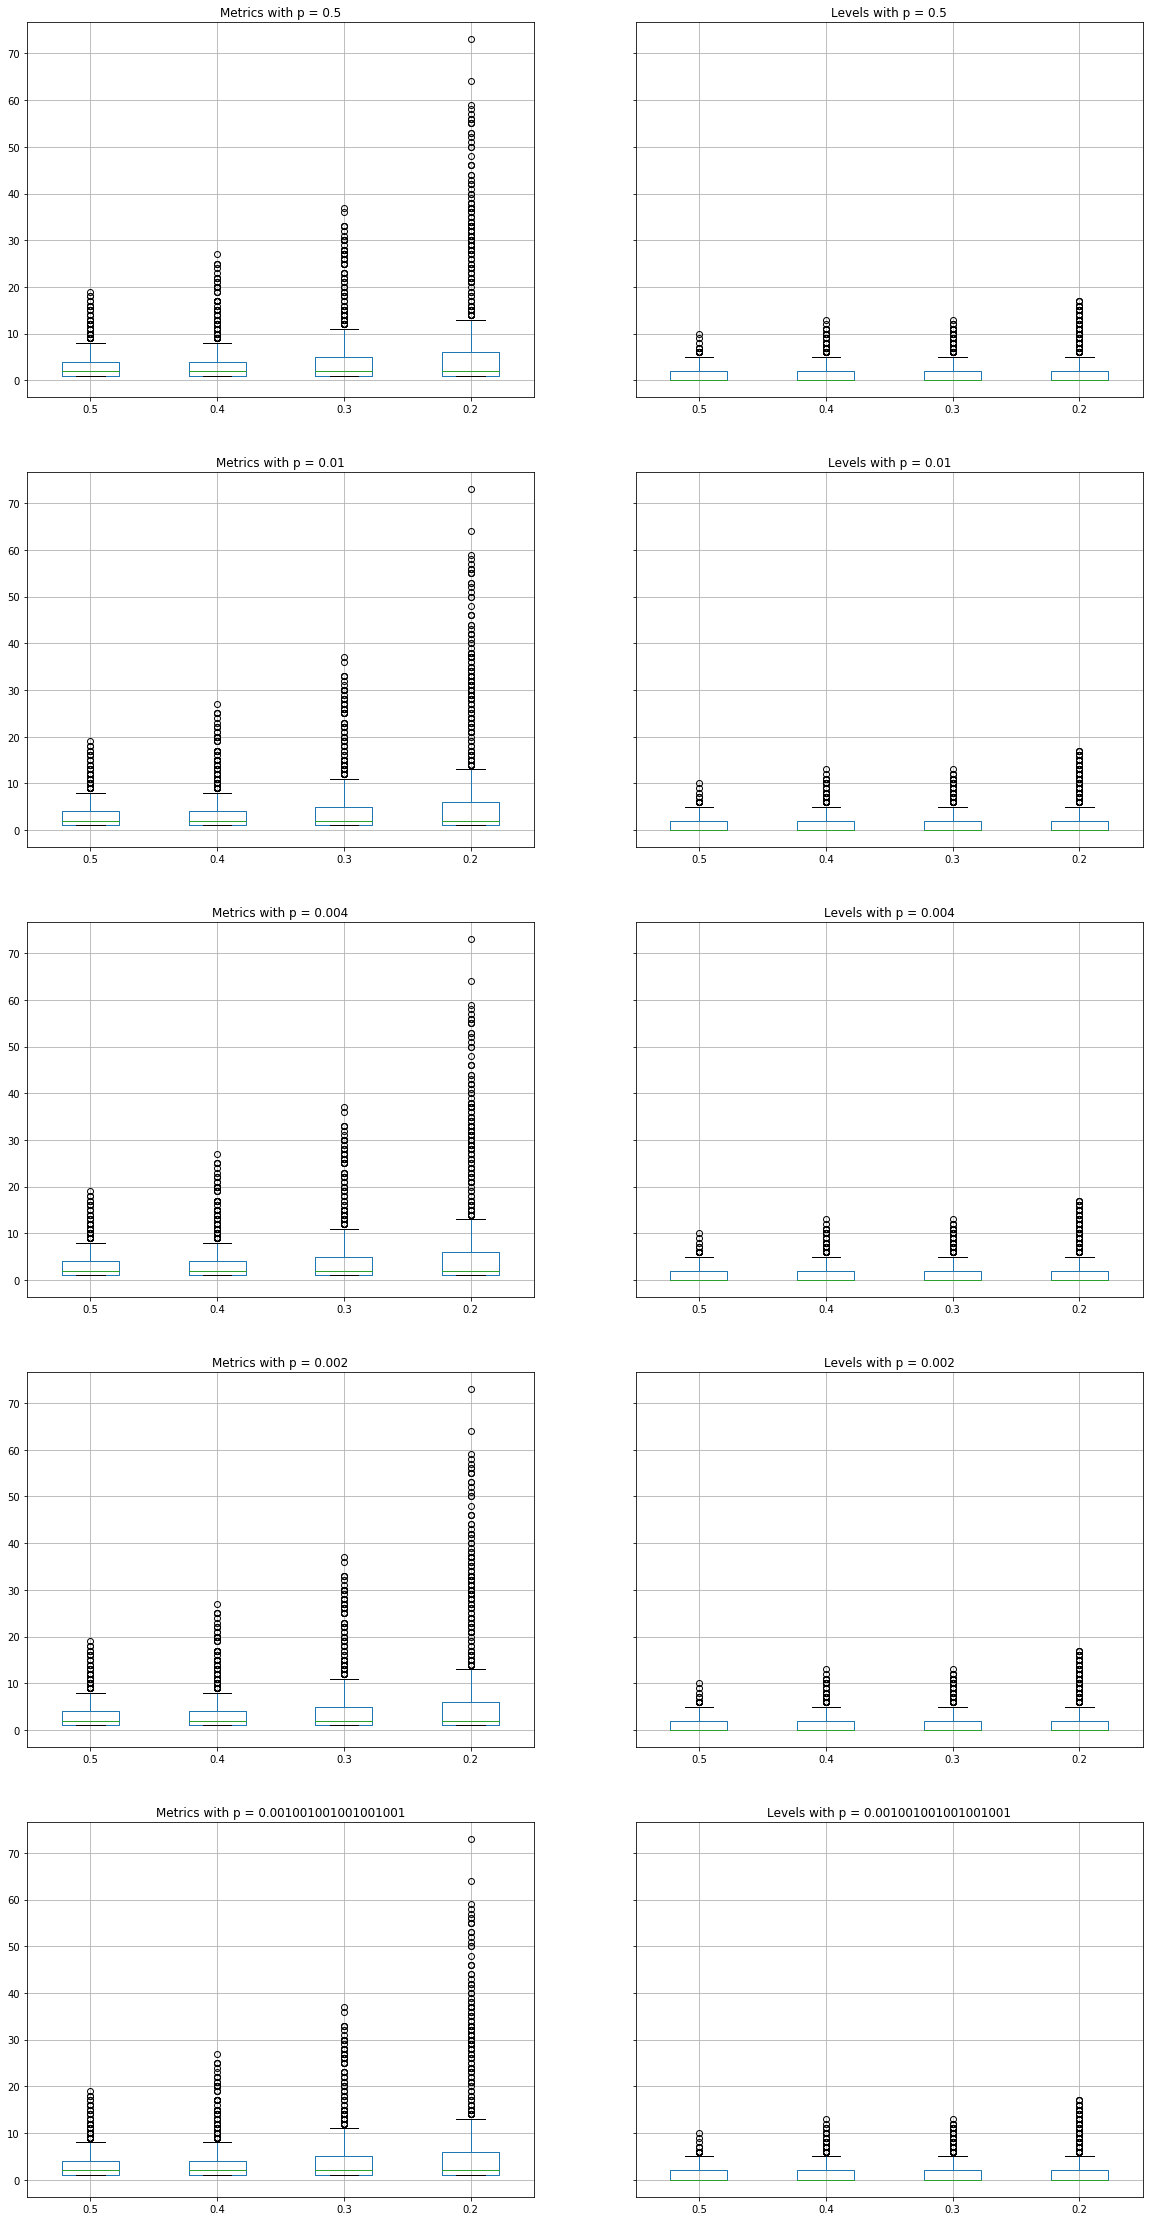

In [7]:
plot_data(True, data_dir_ref, True)

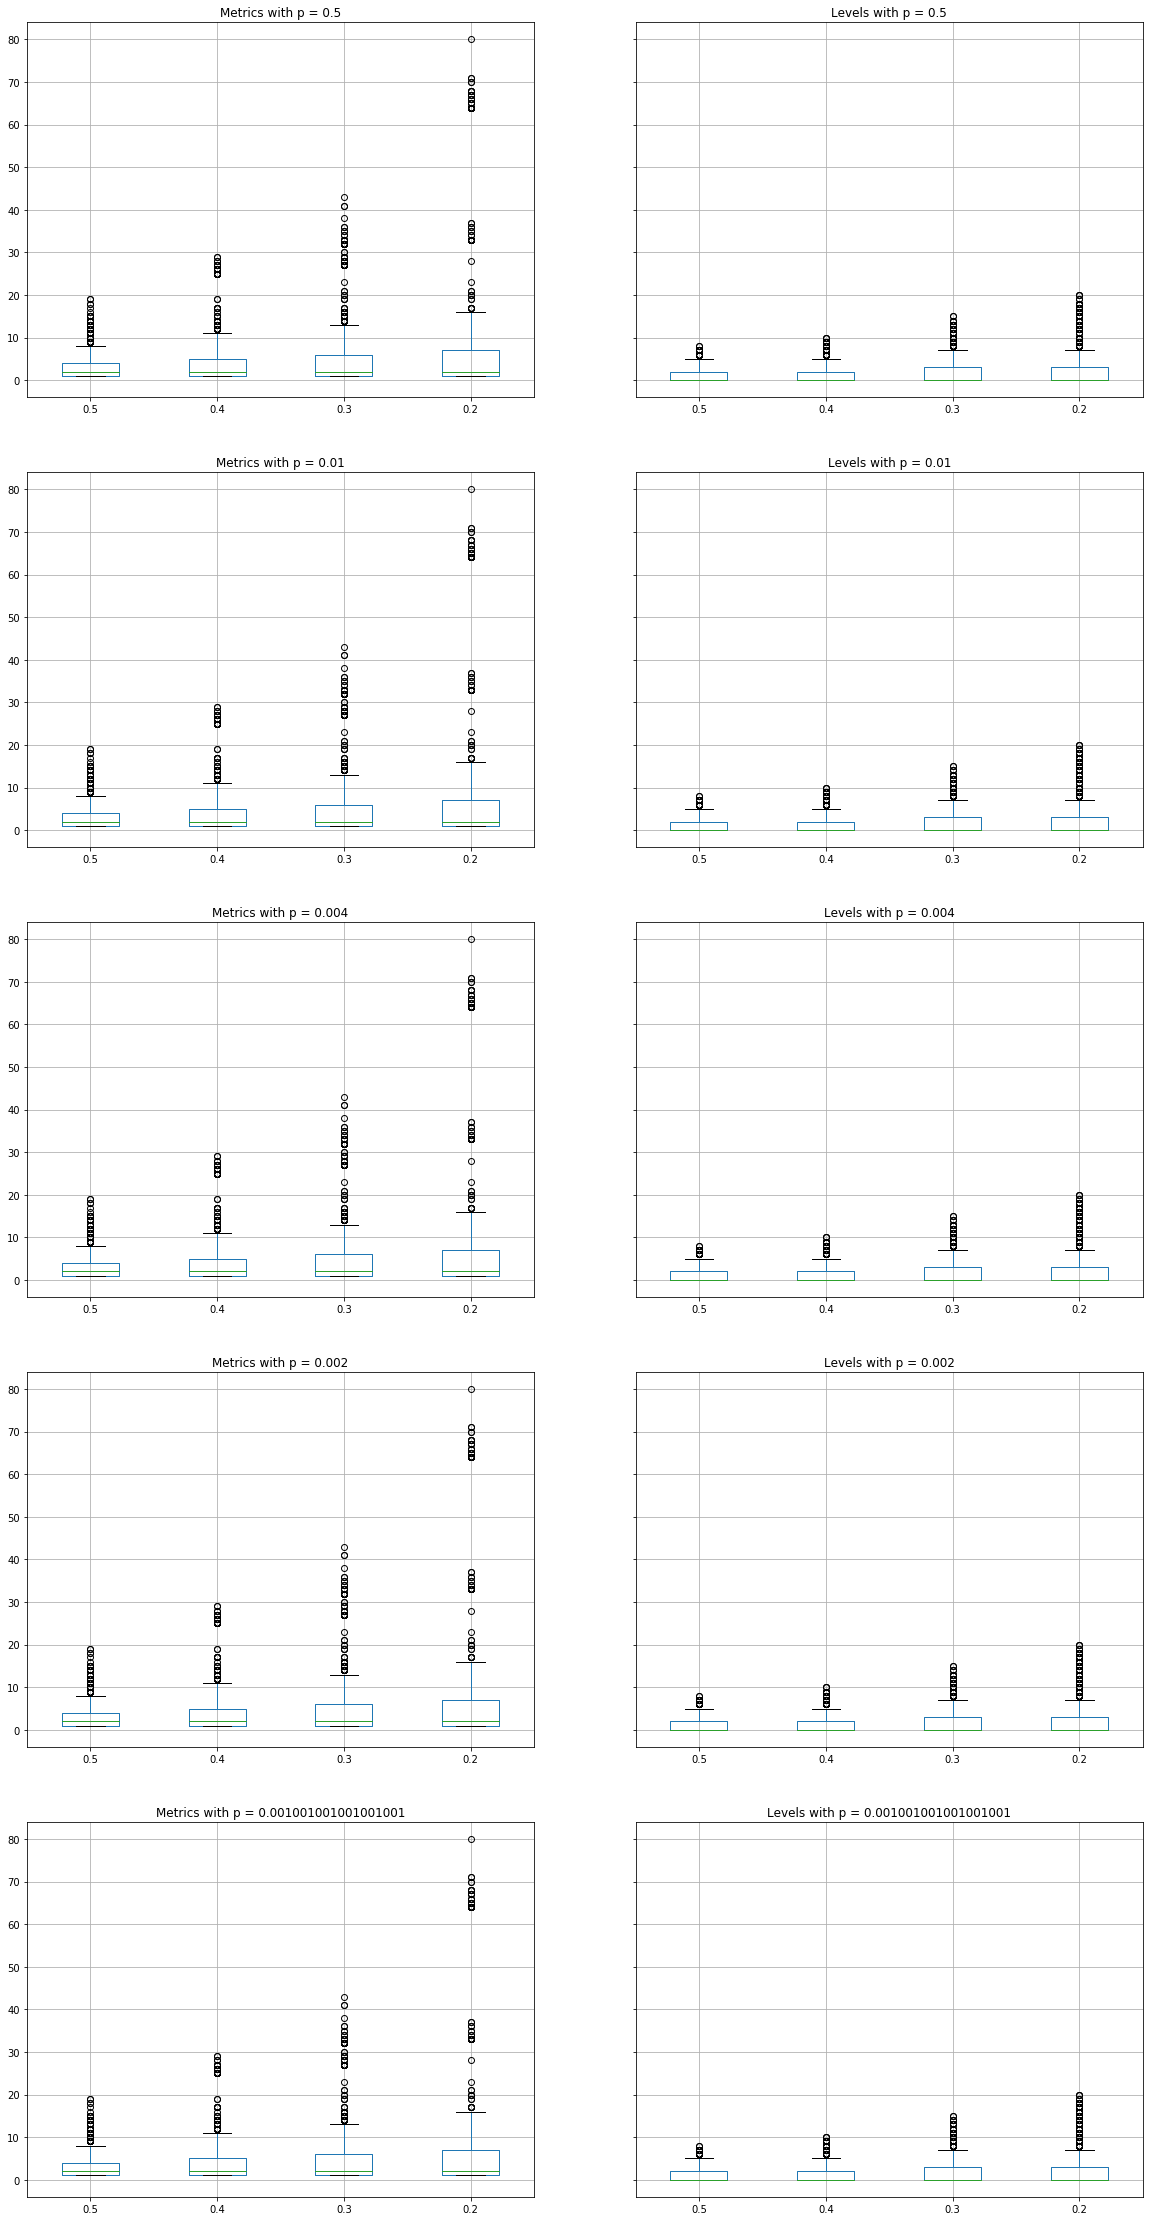

In [8]:
plot_data(False, data_und_ref, True)

In [9]:
print("### DIRECTED ###", end = "\n\n")
for k in stats_dir.keys():
    print("Gnp with p = ", k)
    print(stats_dir[k], end = "\n\n")

### DIRECTED ###

Gnp with p =  0.5
    res  avg_FLTR  avg_exp_level
0  1.00    1000.0            1.0
1  0.75    1000.0            1.0
2  0.50    1000.0            1.0
3  0.25    1000.0            1.0

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00   127.953          4.365
1  0.75   999.003          6.409
2  0.50  1000.000          5.006
3  0.25  1000.000          4.195

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00     5.042          1.025
1  0.75   405.861         17.064
2  0.50   844.771         12.036
3  0.25   930.225          8.865

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00     2.963          0.839
1  0.75     4.780          1.858
2  0.50    15.091          4.203
3  0.25   364.383         17.304

Gnp with p =  0.001001001001001001
    res  avg_FLTR  avg_exp_level
0  1.00     2.046          0.489
1  0.75     2.418          0.701
2  0.50     3.004          0.949
3  0.25     6.048          1.894



In [10]:
print("### UNDIRECTED ###", end = "\n\n")

for k in stats_und.keys():
    print("Gnp with p = ", k)
    print(stats_und[k], end = "\n\n")

### UNDIRECTED ###

Gnp with p =  0.5
    res  avg_FLTR  avg_exp_level
0  1.00    1000.0            1.0
1  0.75    1000.0            1.0
2  0.50    1000.0            1.0
3  0.25    1000.0            1.0

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00   187.459          5.180
1  0.75   999.006          6.276
2  0.50   999.006          4.960
3  0.25  1000.000          4.036

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00     4.780          1.018
1  0.75   217.695         15.436
2  0.50   764.900         15.417
3  0.25   890.928         10.531

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00     2.847          0.791
1  0.75     4.437          1.699
2  0.50    11.853          4.317
3  0.25   315.591         16.154

Gnp with p =  0.001001001001001001
    res  avg_FLTR  avg_exp_level
0  1.00     1.984          0.462
1  0.75     2.260          0.607
2  0.50     2.786          0.854
3  0.25     3.937          1.277



In [11]:
print("### REFINEMENT DIRECTED ###", end = "\n\n")
for k in stats_dir_ref.keys():
    print("Gnp with p = ", k)
    print(stats_dir_ref[k], end = "\n\n")

### REFINEMENT DIRECTED ###

Gnp with p =  0.5
   res  avg_FLTR  avg_exp_level
0  0.5    1000.0            1.0
1  0.4    1000.0            1.0
2  0.3    1000.0            1.0
3  0.2    1000.0            1.0

Gnp with p =  0.01
   res  avg_FLTR  avg_exp_level
0  0.5   999.001          4.825
1  0.4   999.001          4.369
2  0.3   999.001          4.075
3  0.2   999.001          4.012

Gnp with p =  0.004
   res  avg_FLTR  avg_exp_level
0  0.5   863.724         11.922
1  0.4   895.748         10.950
2  0.3   913.890          9.120
3  0.2   934.215          8.261

Gnp with p =  0.002
   res  avg_FLTR  avg_exp_level
0  0.5    25.397          6.556
1  0.4   134.043         18.282
2  0.3   325.668         20.763
3  0.2   445.454         17.504

Gnp with p =  0.001001001001001001
   res  avg_FLTR  avg_exp_level
0  0.5     3.016          0.976
1  0.4     3.578          1.264
2  0.3     4.515          1.536
3  0.2     6.894          2.161



In [12]:
print("### REFINEMENT UNDIRECTED ###", end = "\n\n")
for k in stats_und_ref.keys():
    print("Gnp with p = ", k)
    print(stats_und_ref[k], end = "\n\n")

### REFINEMENT UNDIRECTED ###

Gnp with p =  0.5
   res  avg_FLTR  avg_exp_level
0  0.5    1000.0            1.0
1  0.4    1000.0            1.0
2  0.3    1000.0            1.0
3  0.2    1000.0            1.0

Gnp with p =  0.01
   res  avg_FLTR  avg_exp_level
0  0.5   999.002          4.874
1  0.4   999.002          4.457
2  0.3  1000.000          4.141
3  0.2  1000.000          4.018

Gnp with p =  0.004
   res  avg_FLTR  avg_exp_level
0  0.5   872.954         12.758
1  0.4   910.022         11.183
2  0.3   929.254          9.450
3  0.2   946.751          8.692

Gnp with p =  0.002
   res  avg_FLTR  avg_exp_level
0  0.5    17.520          4.773
1  0.4    81.387         12.283
2  0.3   387.799         22.729
3  0.2   481.292         16.417

Gnp with p =  0.001001001001001001
   res  avg_FLTR  avg_exp_level
0  0.5     3.370          1.140
1  0.4     4.181          1.359
2  0.3     5.749          1.914
3  0.2     9.430          2.543

